In [1]:
import sys
sys.path.insert(0, '..')
import qtm.qcompilation
import matplotlib.pyplot as plt
import qiskit
import qtm.qsp
import qtm.ansatz, qtm.state
%load_ext autoreload
%autoreload 2

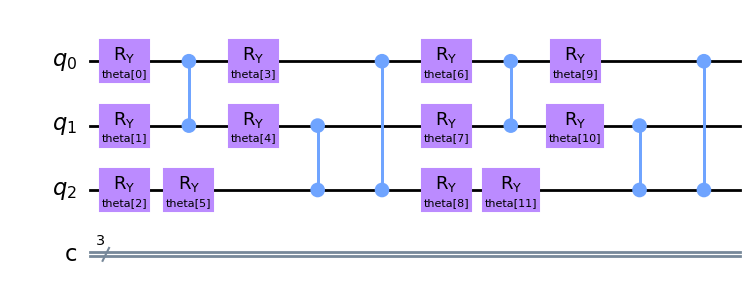

In [45]:
qtm.ansatz.g2(3, 2).draw('mpl')

In [4]:
def f(num_qubits, num_layers, anszat, vdagger_input):
    optimizer = 'adam'

    if anszat == 'g2':
        u_input = qtm.ansatz.g2(num_qubits, num_layers) 
        ansatz_input = qtm.ansatz.g2
    if anszat == 'g2gn':
        u_input = qtm.ansatz.g2gn(num_qubits, num_layers) 
        ansatz_input = qtm.ansatz.g2gn
    if anszat == 'g2gnw':
        u_input = qtm.ansatz.g2gnw(num_qubits, num_layers) 
        ansatz_input = qtm.ansatz.g2gnw
        
    if vdagger_input == 'ghz':
            vdagger = qtm.state.create_ghz_state(num_qubits).inverse()
    if vdagger_input == 'w':
            vdagger = qtm.state.create_w_state(num_qubits).inverse()
    if vdagger_input == 'ame':
            vdagger = qtm.state.create_ame_state(num_qubits).inverse()   
    if vdagger_input == 'haar':
            vdagger = qtm.state.create_haar_state(num_qubits).inverse() 
    compiler = qtm.qcompilation.QuantumCompilation(
        u = u_input,
        vdagger = vdagger,
        optimizer = optimizer,
        loss_func = 'loss_fubini_study'
    )
    compiler.fit(num_steps = 10, verbose = 1)
    qspobj = qtm.qsp.QuantumStatePreparation(
        compiler.u, 
        compiler.vdagger,
        compiler.thetas,
        ansatz = ansatz_input)
    qspobj.save(state = vdagger_input, file_name='./')

    return

['haar_g2_5_2.qspobj', 'haar_g2gn_5_8.qspobj', 'haar_g2gn_5_2.qspobj', 'haar_g2_5_1.qspobj', 'haar_g2_5_5.qspobj', 'haar_g2gn_5_3.qspobj', 'haar_g2gnw_5_1.qspobj', 'haar_g2gn_5_1.qspobj']
0.9913009221786997 56 120
0.9814907939590881 14 30
0.9814907939590881 14 30
0.9814907939590881 14 30
Found g2gn 2 layers which can prepare state haar 5 qubits >= 0.9299999999999999 fidelity (0.9814907939590881)


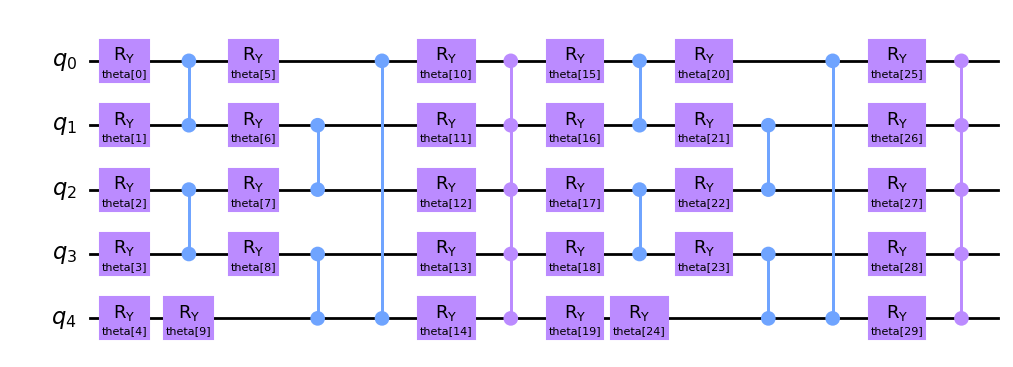

In [62]:
database_path = '../experiments/qsp/'
state = 'haar'
num_qubits = 5
best_ansatz = qtm.qsp.QuantumStatePreparation.find_satisfying_qspobj(
    state, num_qubits, 
    error_rate = 0.07, 
    database_path = database_path)
best_ansatz.u.draw('mpl')

In [ ]:
str = 'ghz_g2_3_2.qspobj'
